In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En primer lugar, importaremos la base de datos y realizaremos una rápida revisión de los campos.

In [66]:
df=pd.read_excel('Abortion Support.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Poll Date                   63 non-null     object 
 1   Legal under any %           63 non-null     float64
 2   Legal only under certain %  63 non-null     float64
 3   Illegal in all %            63 non-null     float64
 4   No opinion %                63 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.6+ KB


Podemos ver que los valores que no contiene valores nulos, y que además los tipos de datos están de acuerdo a lo que representa cada columna. Revisaremos la estadística de cada variable para revisar no existan valores atípicos.

In [67]:
df.describe()

,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
count,63.000000,63.000000,63.000000,63.000000
mean,0.266032,0.532063,0.178095,0.024762
std,0.034009,0.028407,0.025832,0.012162
min,0.210000,0.480000,0.120000,0.010000
25%,0.240000,0.510000,0.160000,0.020000
50%,0.260000,0.530000,0.180000,0.020000
75%,0.290000,0.550000,0.195000,0.030000
max,0.340000,0.610000,0.230000,0.070000


De lo anterior vemos que el min, max y promedio se encuentra dentro de los valores esperados para un porcentaje (0-1).

Para realizar el gráfico esperado, realizaremos una separación de la fecha en "Poll Date" para obtener el año de la encuesta. Para eso, en primer lugar cambiaremos el nombre de la columna a una sin espacios, y revisamos el formato.

In [68]:
df=df.rename(columns={'Poll Date':'Poll_Date'})
df['Poll_Date'].value_counts()

2002 May 6-9         1
1981 May 8-11        1
1988 Sep 25-Oct 1    1
1989 Jul 6-7         1
1979 Feb 23-26       1
                    ..
1996 Sep 20-22 ^     1
1995 Sep 22-24       1
2019 May 1-12        1
1980 Jul 11-14       1
1999 Apr 30-May 2    1
Name: Poll_Date, Length: 63, dtype: int64

Dado que se encuentra primero el año, separaremos la columna por espacio y añadiremos la columna "Año" a la base de datos:

In [69]:
fecha=df.Poll_Date.str.split(pat=' ',expand=True)
df['Año']=fecha[0]
df

,Poll_Date,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %,Año
0,2021 May 3-18,0.32,0.48,0.19,0.02,2021
1,2020 May 1-13,0.29,0.50,0.20,0.02,2020
2,2019 May 1-12,0.25,0.53,0.21,0.02,2019
3,2018 May 1-10,0.29,0.50,0.18,0.02,2018
4,2017 May 3-7,0.29,0.50,0.18,0.03,2017
...,...,...,...,...,...,...
58,1981 May 8-11,0.23,0.52,0.21,0.04,1981
59,1980 Jul 11-14,0.25,0.53,0.18,0.04,1980
60,1979 Feb 23-26,0.22,0.54,0.19,0.05,1979
61,1977 Dec 9-12,0.22,0.55,0.19,0.04,1977


Adicional, dejaremos las variables como porcentaje multiplicando cada una por 100.

In [70]:
df['Legal under any %']=df['Legal under any %']*100
df['Legal only under certain %']=df['Legal only under certain %']*100
df['Illegal in all %']=df['Illegal in all %']*100
df['No opinion %']=df['No opinion %']*100
df=df.sort_values(by=['Año'])

Ahora revisaremos si hay más de un valor por año, y si corresponden a encuestas distintas:

In [91]:
df_aux=df.groupby(df['Año'])[['Legal under any %','Legal only under certain %','Illegal in all %']].count().reset_index()
repetidos=list(set(df_aux.loc[df_aux['Legal under any %']>1,:]['Año']))
df[df['Año'].isin(repetidos)]

,Poll_Date,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %,Año
54,1989 Apr 12-13,27.0,50.0,18.0,5.0,1989
53,1989 Jul 6-7,29.0,51.0,17.0,3.0,1989
52,1989 Jul 6-9,29.0,51.0,17.0,3.0,1989
50,1991 May 30-Jun 2,32.0,50.0,17.0,1.0,1991
49,1991 Sep 5-8,33.0,49.0,14.0,4.0,1991
48,1992 Jan 16-19,31.0,53.0,14.0,2.0,1992
47,1992 Jul 23-24 ^,34.0,48.0,15.0,3.0,1992
44,1994 Sep 6-7,33.0,52.0,13.0,2.0,1994
45,1994 Mar 28-30,31.0,51.0,15.0,3.0,1994
43,1995 Feb 24-26,33.0,50.0,15.0,2.0,1995


A continuación sacamos el porcentaje promedio por año dado que podemos ver que hay más de una encuesta por año en algunos casos.

In [94]:
df2=df.groupby(df['Año'])[['Legal under any %','Legal only under certain %','Illegal in all %']].mean().reset_index()
df2.head()

,Año,Legal under any %,Legal only under certain %,Illegal in all %
0,1975,21.0,54.0,22.0
1,1977,22.0,55.0,19.0
2,1979,22.0,54.0,19.0
3,1980,25.0,53.0,18.0
4,1981,23.0,52.0,21.0


In [118]:
df2['Año'].value_counts()

2007    1
2021    1
2003    1
2000    1
2008    1
1975    1
2014    1
1997    1
2010    1
2005    1
1995    1
2001    1
1981    1
2015    1
1990    1
2006    1
2013    1
2004    1
1999    1
1979    1
1988    1
1989    1
1983    1
2009    1
1985    1
2012    1
1996    1
2016    1
1977    1
1993    1
1994    1
2019    1
2018    1
2017    1
2011    1
1992    1
1980    1
2020    1
1998    1
1991    1
2002    1
Name: Año, dtype: int64

Con los datos preprocesados, podemos realizar un gráfico para analizar el progreso de la opinión pública a través de los años.

<ipython-input-121-484ab8d28c1f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df2['Año'], rotation = 90)


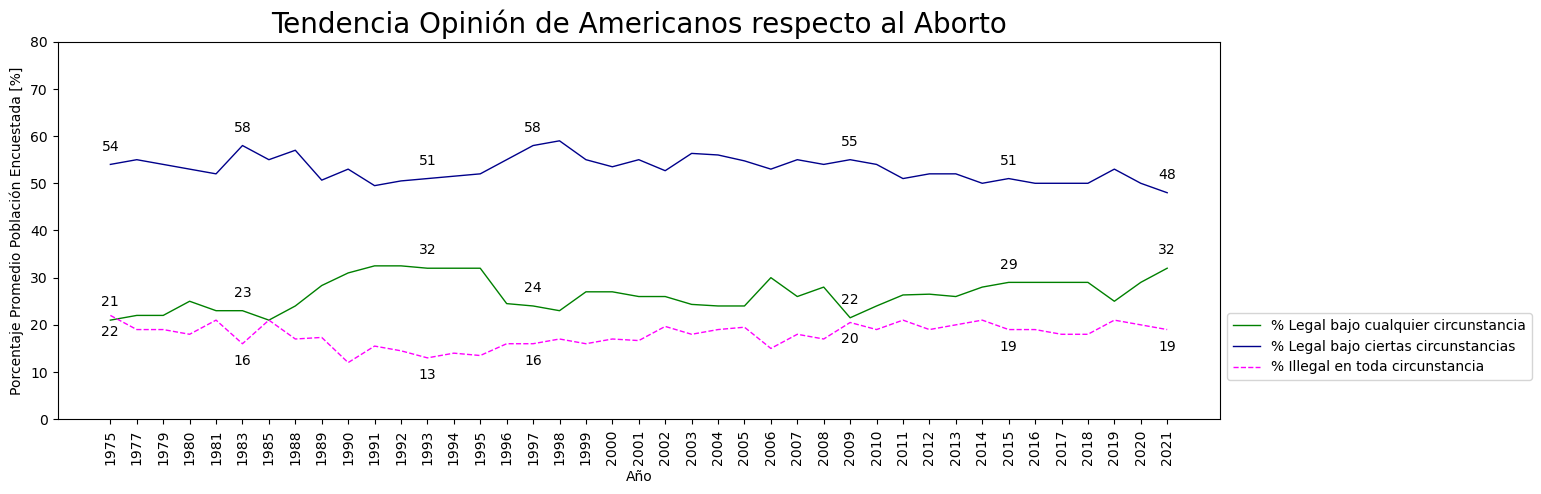

In [121]:
fig1 = plt.figure(figsize=(15,5),dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(df2['Año'],df2['Legal under any %'],'-',color='green', linewidth=1, ms=10)
ax1.plot(df2['Año'],df2['Legal only under certain %'],'-',color='darkblue', linewidth=1, ms=10)
ax1.plot(df2['Año'],df2['Illegal in all %'],'--',color='magenta', linewidth=1, ms=10)

ax1.set_xticklabels(df2['Año'], rotation = 90)
ax1.set_ylim(0,80)

plt.ylabel("Porcentaje Promedio Población Encuestada [%]")
plt.xlabel("Año")
plt.title("Tendencia Opinión de Americanos respecto al Aborto", fontsize=20)
plt.legend(['% Legal bajo cualquier circunstancia', '% Legal bajo ciertas circunstancias', '% Illegal en toda circunstancia'],bbox_to_anchor=(1,0.3))

a=df2['Año']
y1=df2['Legal under any %']
y2=df2['Legal only under certain %']
y3=df2['Illegal in all %']

años=['1975','1983','1993','1997','2009','2015','2021']

for x,y in zip(a,y1):
    if x in años:
        b = "{:.0f}".format(y)
        plt.annotate(b,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')
        
for x,y in zip(a,y2):
    if x in años:
        b = "{:.0f}".format(y)
        plt.annotate(b,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')

for x,y in zip(a,y3):
    if x in años:
        b = "{:.0f}".format(y)
        plt.annotate(b,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,-15),
                     ha='center')
        
plt.show()